# Importing Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [2]:
spam=pd.read_csv('C:/Users/VinoSekar-VP/Desktop/kaggle/Internship/Dataset/spam sms detection/spam.csv',encoding='latin-1')
spam

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
spam=spam.rename(columns={'v1':'Class','v2':'text'})
spam.drop(['Unnamed: 2' ,'Unnamed: 3' ,'Unnamed: 4'],axis=1,inplace=True)
spam

,Class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
spam['Length']=spam['text'].apply(len)
spam.head(5)

,Class,text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Visualization

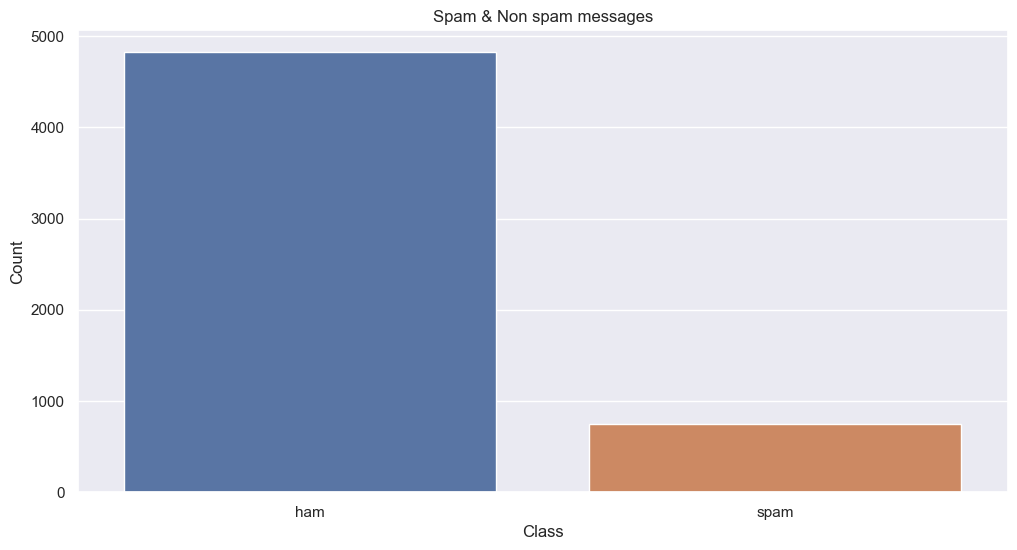

In [5]:
plt.figure(figsize=(12,6))
sns.countplot(x='Class',data=spam)
plt.title("Spam & Non spam messages")
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

<Axes: xlabel='Class', ylabel='Length'>

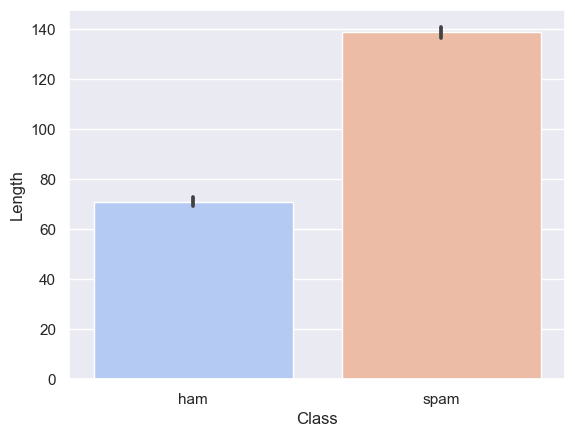

In [6]:
sns.barplot(x='Class',y='Length',data=spam,palette='coolwarm')

# NLP Preprocessing

In [7]:
#Remove Punctuations,stopwords
def clean(spam):
    nopunc=[word for word in spam if word not in string.punctuation]
    nopunc=''.join(nopunc)
    m=[word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return m

In [8]:
cv=CountVectorizer(analyzer=clean).fit(spam['text'])

In [9]:
cvt=cv.transform(spam['text'])

# Term Frequency

In [10]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer=TfidfTransformer().fit(cvt)
messages_tfidf=tfidf_transformer.transform(cvt)

# Train Test Split

In [11]:
x=spam['text']
y=spam['Class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

# Naive Bayes

In [12]:
#Creating Pipeline
nbpl=Pipeline([
    ('cv',CountVectorizer(analyzer=clean)),
    ('transform',TfidfTransformer()),
    ('alg',MultinomialNB()),
])

# Training Naive Bayes 

In [13]:
nbpl.fit(x_train,y_train)
nbpred=nbpl.predict(x_test)

# Evaluate the model

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1460
        spam       1.00      0.66      0.79       212

    accuracy                           0.96      1672
   macro avg       0.98      0.83      0.88      1672
weighted avg       0.96      0.96      0.95      1672


 confusion_matrix


<Axes: >

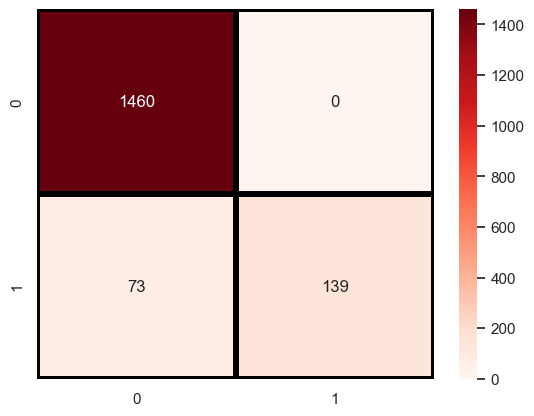

In [14]:
print(classification_report(y_test,nbpred))
print('\n confusion_matrix')
sns.heatmap(confusion_matrix(y_test,nbpred),annot=True,fmt='g',cmap='Reds',linecolor='black',linewidths=4)

# Random Forest Classifier

In [15]:
# Creating Pipeline
rfcpl=Pipeline([
    ('cv',CountVectorizer(analyzer=clean)),
    ('transform',TfidfTransformer()),
    ('alg',RandomForestClassifier(n_estimators=100)),
])

# Train Random Forest Classifier Model

In [16]:
rfcpl.fit(x_train,y_train)
rfcpred=rfcpl.predict(x_test)

# Evaluate the model

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98      1460
        spam       0.99      0.73      0.84       212

    accuracy                           0.96      1672
   macro avg       0.97      0.86      0.91      1672
weighted avg       0.97      0.96      0.96      1672


 confusion_matrix


<Axes: >

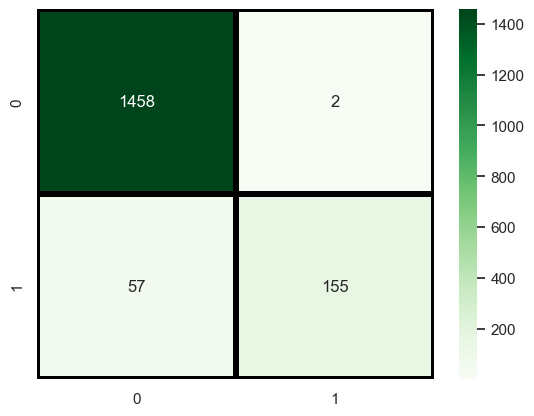

In [17]:
print(classification_report(y_test,rfcpred))
print('\n confusion_matrix')
sns.heatmap(confusion_matrix(y_test,rfcpred),annot=True,fmt='g',cmap='Greens',linecolor='black',linewidths=4)

# Logistic Regression

In [18]:
#Creating Pipeline
lrpl=Pipeline([
    ('cv',CountVectorizer(analyzer=clean)),
    ('transform',TfidfTransformer()),
    ('alg',LogisticRegression()),
])

# Train Logistic Regression Model

In [19]:
lrpl.fit(x_train,y_train)
lrpred=lrpl.predict(x_test)

# Evaluate the model

              precision    recall  f1-score   support

         ham       0.94      1.00      0.97      1460
        spam       0.98      0.56      0.71       212

    accuracy                           0.94      1672
   macro avg       0.96      0.78      0.84      1672
weighted avg       0.95      0.94      0.94      1672


 confusion_matrix


<Axes: >

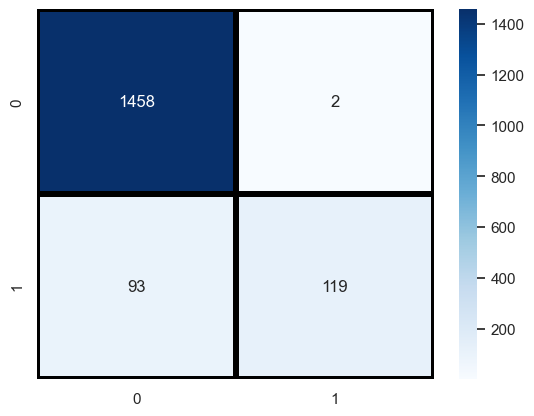

In [20]:
print(classification_report(y_test,lrpred))
print('\n confusion_matrix')
sns.heatmap(confusion_matrix(y_test,lrpred),annot=True,fmt='g',cmap='Blues',linecolor='black',linewidths=4)